# Comparision Of Different Neural Networks' Optimizers

---
#### Course: Aritificial Intelligence
#### Professor: Dr. Mehdi Ghatee
#### TA: Rouhollah Ahmadian
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### December 2022 

# Table Of Contents
- [Introduction](#intro)
- [Dependencies](#dependency)
- [Dataset](#dataset)
    - [Importing Data](#import-data)
    - [Dataset Notes](#notes)
- [Approach](#approach)
- [Preprocessing](#preprocessing)
    - [Encoding Labels](#encoding)
    - [Data Split](#split)
    - [Normalization](#normalization)
- [Preparing Comparator](#comparator)
    - [Model](#model)
    - [Examination Method](#examination)
- [Optimizers](#optimizers)
    - [Gradient Descent](#gd)
    - [Stochastic Gradient Descent](#sgd)
    - [Batch Gradient Descent](#bgd)
    - [RMSProp](#rmsprop)
    - [Adam](#adam)
- [Final Statistics](#together)

<a name="intro"></a>

# Introduction 📚

---

**Iris dataset** is perhaps the best known dataset to be found in the
pattern recognition literature and it was first used by Sir R.A. Fisher.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other. we will import and use this dataset from sklearn library. You can read more about it
[Here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).
It is slightly different from UCI Machine Learning Repository.

In this article we will compare performance of 5 neural network optimizers on the Iris dataset. These optimizers are:
 - Gradient Descent
 - Stochastic Gradient Descent
 - Batch Gradient Descent
 - RMSprop
 - Adam

<a name="dependency"></a>

#Dependencies 🧰

---

We need the following libraries during this article:

- **numpy** : <br />
    numpy is a commonly used library for doing scientific computation. Unlike python default pointer structure, numpy saves variables inplace and continous on RAM and also provides sophisticated methods that use parallelism to make our computations much faster.

- **pandas**: <br />
    pandas is also a common tool of data scientists. It provides many methods for data manipulation.

- **matplotlib** : <br />
    We will use matplotlib to show our charts.

- **seaborn** : <br />
    seaborn is built on matplotlib and provides many chart templates for us so we don't need to draw and build every components of our charts with matplotlib.

- **scikit-learn (sklearn)** : <br />
    This library is a known data science library and we will import iris dataset from it and also some metric methods as well.

- **keras** : <br />
    This library along pytorch is most known library for neural networks. It has implementation of many neural network layers, optimizers, activation functions and loss functions and lets us build many different and custom neural networks.

In [ ]:
%%capture

# Fundamental Data Analysis Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Common useful classes and methods from scikit-learn
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score

# Importing iris loader method from sklearn
from sklearn.datasets import load_iris

# We will use keras to build our model and 
# compare different optimizers' performances
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau
)
from keras.optimizers import (
    SGD, RMSprop,
    Adadelta, Adam
)

<a name="dataset"></a>

#Dataset ❓

---

As mentioned above, we will use Iris dataset from sklearn library. Every dataset in sklearn is a **dictionary** that contains features, target, labels, dataset's description and etc.

<a name="import-data"></a>

####Importing Data

Here we load iris dataset from sklearn library.


In [ ]:
iris = load_iris()

# Every dataset in sklearn is a dictionary object
# Lets observe keys of iris dictionary
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Now we should convert **'data'** into a pandas DataFrame with column names from **'feature_names'**.

In [ ]:
data = pd.DataFrame(iris['data'], columns = iris['feature_names'])

# Lets take a look in the imported dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Also we import class labels into a single column DataFrame named **"target"**. Class labels are accessible from **'target'** key of the iris dictionary.

In [ ]:
target = pd.DataFrame(iris['target'], columns=['class'])

# Lets take a look in the imported dataset
target.head()

,class
0,0
1,0
2,0
3,0
4,0


Next we extract label of each class from **'target_names'** of the iris dictionary.

In [ ]:
list_of_labels = iris['target_names'].tolist()

labels = {i:label for i, label in enumerate(list_of_labels)}

print(labels)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


Perfect, our features and labels are ready to use!

<a name="notes"></a>

####Dataset Notes 📖

Iris dictionary that we imported sklearn library, includes a key named **'DESCR'**.
This key, points to a string which is the summary of the dataset statistics and its history. First 35 lines of this string include some useful details about the dataset.

Before going to the next section, lets see these lines of the dataset's description:


In [ ]:
# We just need first 35 lines of description
notes_lines = iris['DESCR'].split('\n')[:35]

# Converting list of 35 lines into a single string
notes = '\n'.join(notes_lines)

print(notes)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<a name="approach"></a>

#Approach 🧭

---

Sixth line of the dataset description states that:
> Number of Instances: 150 (50 in each of three classes)

so we only have 150 cases to use and we must be careful about number of test cases and also it is a good idea to use keras callbacks to avoid overfitting and also reducing learning rate in the training process.

Also lines 29 & 30 of the dataset mentions:

> Missing Attribute Values: None

> Class Distribution: 33.3% for each of 3 classes.

So there is no NaN value nor skewed classes in the dataset and we can skip checking anomalities unliked the previous homework (Report5).

Notice that in the statistics part of the description, we can see that the features are not normalized and although their scales are not that much different, but it is better to normalized the features.

Also we must encode the class column of the **data** dataframe, we will use one hot encoder from sklearn for this purpose.

So briefly what components we need?

 - ❌**Anomality checking** : </br>
    We saw in the description, that there is no NaN value nor skewed classes in the dataset so we don't need to check it again.

 - ✅**Normalization** : </br>
    From the dataset statistics which we saw in its descripition, features are not normalized and it is a good idea to normalize them.

 - ✅**Encoding Labels** : </br>
    in the **class** column of the data variable we have put string label of each class, we should one hot encode these labels to add new columns, one columns for each class.

 - ❌**Dimensionality Reduction** : </br>
    Dataset has total of 4 features and 150 records so it is a small dataset and we don't need dimensionality reduction.

 - ✅**Train-Test Split** : </br>
    We will need a test set to check our model's final score and also to check high bias or variance. We will take a small portion of our dataset for testing.

 - ✅**Setting Up Examiner** : </br>
    We will need a central unique examiner method to optimize our model using a given optimizer and display results and charts about the process of optimization.


<a name="preprocessing"></a>

#Preprocessing 🧹

---

We will implement **Encoding**, **Train-Test Split** and **Normalization** steps in this section.

<a name="encoding"></a>

####Encoding Labels

Firstly we should encode class labels, we create a different column for each class and members of that class will have value of 1 in that column and other records will have a value of 0, this method of encoding is called **One Hot Encoding**.

We use **OneHotEncoder** class from sklearn library to do this task:


In [ ]:
encoded_target = pd.DataFrame(OneHotEncoder().fit_transform(target).
                              toarray().
                              astype(np.int32),
                              columns=labels.values())

encoded_target.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


<a name="split"></a>

####Data Split

We take 20% of the all cases for test set, also notice that cases of different classes are presented in the order of their class number, so we should set shuffle argument to True so train_test_split method shuffles the cases before splitting.

We use **train_test_split** method of the sklearn library:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, encoded_target,
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

<a name="normalization"></a>

####Normalization

We splitted the train and test set before this step because test set properties should not affect the training set normalization, so here we will define an instance of **Normalizer** class from sklearn library and fit it on the training set, then we will use it to normalize bot test and training set. 


In [ ]:
# Defining instance of Normalizer and fitting it on training features
transformer = Normalizer().fit(X_train)

# Normalizing train and test features using transformer
X_train = pd.DataFrame(transformer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns=X_test.columns)

# Lets see the new values...
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.775771,0.607125,0.168646,0.033729
1,0.773811,0.597328,0.203635,0.054303
2,0.769454,0.356016,0.505313,0.160782
3,0.786991,0.557452,0.262330,0.032791
4,0.786090,0.571702,0.232254,0.035731


Awesome! you can see that all numbers are now in range of [0, 1]

<a name="comparator"></a>

#Preparing Comparator 🔍

---

We are gonna define a method to build a constant network structure each time that we call it, we will use this method to build and then train our model each time with a different optimizer. So we need to define 2 functions, one for building the model and one for training our model with a given optimizer, second one uses the first one to build the model.

<a name="model"></a>

####Model 🤖

We have a small training set and limited number of features so we should not build a complex deep network, otherwise our model will easily overfit!

Our model contains 2 hidden layers of sizes 16 and 8, notice that it is recommended to use powers of 2 as total number of neurons in each layer because of compability with cpu cores and boosting parallel computation. Each layer uses ReLU as its activation function except the output layer which uses softmax which is necessary for multi-class classification tasks. 

In [ ]:
def get_model():
    '''
    Builds and returns model of the network
    '''
    model = Sequential([
        Dense(16, input_shape=(4,), activation='relu'),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax', name='output'),
    ])

    return model

<a name="examination"></a>

####Examination Method

Next method must give an optimizer and batch size to train the specified model. Giving batch size is necessary because Stochastic, Batch and Full Gradient Descent are just distinguishable by their batch sizes. Each batch is a set of records that we feed to the network in each iteration of the training process. Also epochs is the amount of training iterations, each epoch is one training iteration.

Notice that we just monitor accuracy of the model because there are not skewed classes so it is not necessary to use f1 score.

Also we set 2 callbacks on our model during the training process, these 2 callbacks are:

- EarlyStoping: </br>
    This callback stops the training process when a target parameter doesn't change enough. We will set it to check validation loss so it terminates training process if our model couldn't decrease validation loss anymore. This will help us to stop training before overfit is increased too much.

- ReduceLROnPlateau: ,/br>
    This callback decreases the learning rate if a target parameter didn't decrease anymore. It happens a lot that model cannot converge loss function to a smaller value because learning rate is to high and on each iteration value of loss function jumps over the minimal value, by decreasing the learning rate it can converge to even smaller values.

In [ ]:
def examine_optimizer(optimizer, opt_name, batch_size, data_train, data_test, report):
    '''
    args
    optimizer: an object of the target optimizer to be examined
    opt_name: name of the optimizer to be set in the report dictionary
    batch_size: amount of cases to feed the network in each epoch
    data_train: tuple of (X_train, y_train) to train the model
    data_test: tuple of (X_test, y_test) to test model's accuracy
    report: a dictionary that we will insert optimization history into it
    
    output
    returns report object but history of current training is inserted to it
    '''

    model = get_model()

    early_stopping = EarlyStopping(monitor='val_loss',  
                                    min_delta=0.0001,
                                    patience=10,
                                    mode='auto',
                                    verbose=2)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                  min_delta=0.001,
                                  factor=0.2, 
                                  patience=5,
                                  min_lr=1e-5)


    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(data_train[0], data_train[1],
                        validation_data = data_test,
                        verbose = 0, #silent mode
                        batch_size = batch_size,
                        shuffle = False,
                        callbacks = [early_stopping, reduce_lr],
                        epochs = 500)

    eval = model.evaluate(data_test[0], data_test[1])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # plt.show()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.tight_layout()
    plt.show()

    print(f'Validation Loss: {eval[0]}')
    print(f'Validation Accuracy: {eval[1]}')

    report[opt_name] = (history, eval)

    return report

<a name="optimizers"></a>

#Optimizers 🩹

---

we will compare performance of 5 neural network optimizers on the Iris dataset. These optimizers are:

 - Gradient Descent
 - Stochastic Gradient Descent
 - Batch Gradient Descent
 - RMSprop
 - Adam

 but before the beginning, we should define a dictionary to keep score and history of our models, we will use this dictionary for final conclusion:

In [ ]:
report = {}

<a name="gd"></a>

####Gradient Descent

Gradient Descent also known as Vanilla Gradient Descent is the most basic optimizer, it finds the direction that loss function decreases the most and updates the network weights to move to that direction. This method has some technical disadvantages, most important is that every vector of direction in each step of optimization perpendicular to direction vector of the previous iteration, so It moves using perpendicular vectors which slows down its speed. Also it can fall into a local minima instead of global minima and it will be traped into that local minima. We will use momentum which is inspired from physics, to solve both of these problems.

Epoch 84: early stopping
1/1 [==============================] - 0s 19ms/step - loss: 1.0746 - accuracy: 0.6333


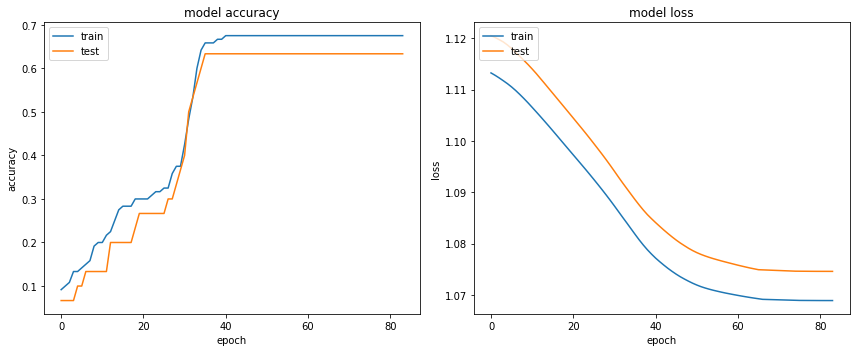

Validation Loss: 1.0745677947998047
Validation Accuracy: 0.6333333253860474


In [ ]:
gradient_descent = SGD(learning_rate=0.01)

report = examine_optimizer(optimizer = gradient_descent,
                  opt_name = 'Full Gradient Descent',
                  batch_size = 120, # full training set
                  data_train = (X_train, y_train),
                  data_test = (X_test, y_test),
                  report = report
                  )

Notice that EarlyStopping stopped the training process after 84 epochs because optimizer couldn't enhance the loss function anymore.

 Also you can see that accuracy increases with a stair form, it is because of ReduceLROnPlateau callback, it observes the loss value during the training process and if loss value doesn't decrease enough, it changes the learning rate to help the optimizer to converge loss function to a small value. We will see chart of learning rate for all optimizers in the final statistics section.

 You can see that Full Gradient Descent has overfitted our model a lot! This is because of feeding a lot of repeatitive samples to our network, in the next part we will see that by decreasing batch size in Stochastic and Batch Gradient Descent, this overfitting happens later.

<a name="sgd"></a>

####Stochastic Gradient Descent

Stochastic Gradient Descent also uses Gradient Descent as optimizer but it just uses 1 sample in each epoch. This way it will be faster and it feeds less repeatitve samples to the network.

1/1 [==============================] - 0s 36ms/step - loss: 0.1848 - accuracy: 0.9667


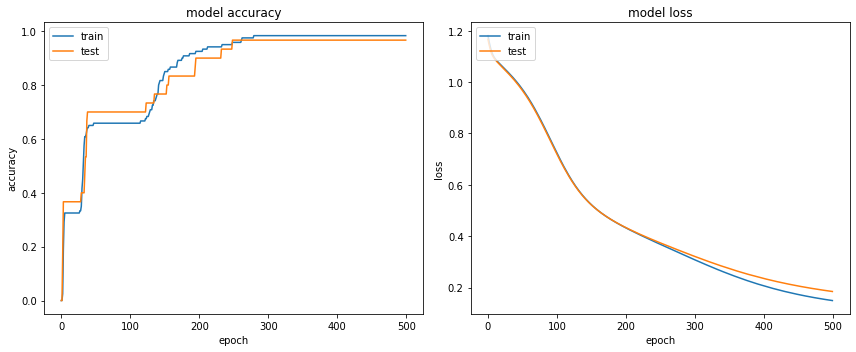

Validation Loss: 0.18480318784713745
Validation Accuracy: 0.9666666388511658


In [ ]:
stochastic_gradient_descent = SGD(learning_rate=0.01)

report = examine_optimizer(optimizer = stochastic_gradient_descent,
                  opt_name = 'Stochastic Gradien Descent',
                  batch_size = 1, # one test case in each iteration
                  data_train = (X_train, y_train),
                  data_test = (X_test, y_test),
                  report = report
                  )

One important property of Stochastic Gradient Descent is that it converges slower, because it uses just 1 sample per epoch so it's much faster than other optimizers but also it has many unnecessary jumps toward other directions than minima. Also reducing learning rate is a necessary act for this optimizer because when it gets closer to the minima, it makes many big and chaotic jumps around the minima so it cannot control itself to go closer to the minima!

It overfitted a bit but EarlyStopping stopped it to avoid too much overfitting!

<a name="bgd"></a>

####Batch Gradient Descent

Batch gradient is exactly like Stochastic and Full Gradient Descent but it uses batch size between 1 and size of training set, this way it will be faster than Full Gradient Descent and converges faster than Stochastic Gradient Descent.

Epoch 123: early stopping
1/1 [==============================] - 0s 146ms/step - loss: 0.1160 - accuracy: 0.9333


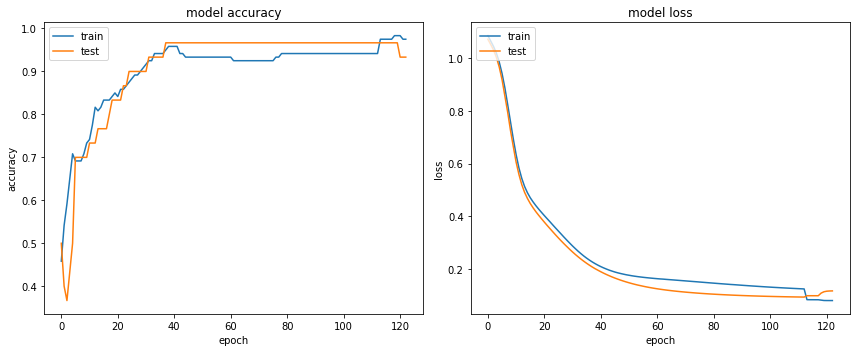

Validation Loss: 0.11604367196559906
Validation Accuracy: 0.9333333373069763


In [ ]:
batch_gradient_descent = SGD(learning_rate=0.01)

report = examine_optimizer(optimizer = batch_gradient_descent,
                  opt_name = 'Batch Gradient Descent',
                  batch_size = 16, # power of 2
                  data_train = (X_train, y_train),
                  data_test = (X_test, y_test),
                  report = report
                  )

You can see it takes about 122 iterations to stops training while it reached the accuracy of Stochastic Gradient Descent which means it converges 5 times faster, but in each iteration it takes more time than each iteration of Stochastic Gradient Descent.

Again EarlyStopping stopped the training process to avoid too much overfitting!

<a name="rmsprop"></a>

####RMSprop


Almost all iterative optimizers implement an extension of Gradient Descent and RMSprop is not an exception. It uses decaying average of partial gradients in the adaptation of the step size for each parameter meaning that it uses second momnetum to enhance optimization. Momentum is an physics concept which indicated which side is already a particle moving toward it. First and second momentum are like speed and acceleration for moving particles. So about all extensions of Gradient Descent use first and second momentum in different ways and RMSprop just uses the second momentum in a decaying form which means that it decreases momentum as it gets closer to the minima which makes sense because we decrease our speed when we arrive to our destination!

Epoch 61: early stopping
1/1 [==============================] - 0s 22ms/step - loss: 0.1110 - accuracy: 0.9333


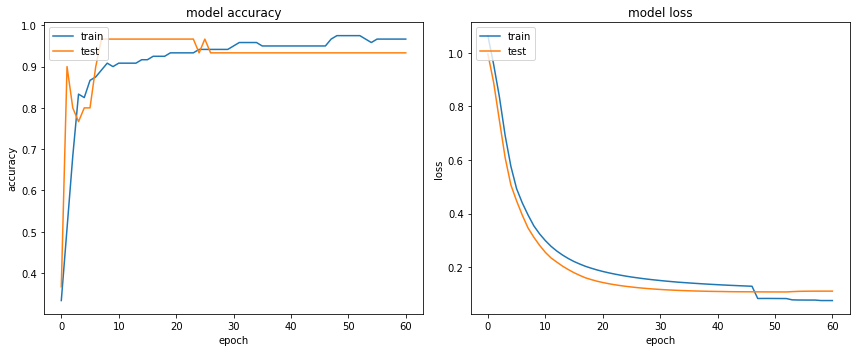

Validation Loss: 0.111019566655159
Validation Accuracy: 0.9333333373069763


In [ ]:
rmsprop = RMSprop(learning_rate=0.01)

report = examine_optimizer(optimizer = rmsprop,
                  opt_name = 'RMSprop',
                  batch_size = 8, # power of 2
                  data_train = (X_train, y_train),
                  data_test = (X_test, y_test),
                  report = report
                  )

It converged in 60 epochs and then it started to overfit as training loss started to decrease but validation loss didn't change so EralyStopping stopped it to avoid too much overfitting.

<a name="adam"></a>

####Adam


As I mentioned for RMSprop, almost all extensions of Gradient Descent use momentum in different ways. Adam uses both first and second momentum which makes to converge much faster and also like RMSprop it decays momentum during the training process to avoid jumping over the minima. Although it needs more calculation but it significantly decreases total number of iterations and that is why it's the most popular optimizer for optimizing neural networks!

Epoch 36: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 0.1267 - accuracy: 0.9333


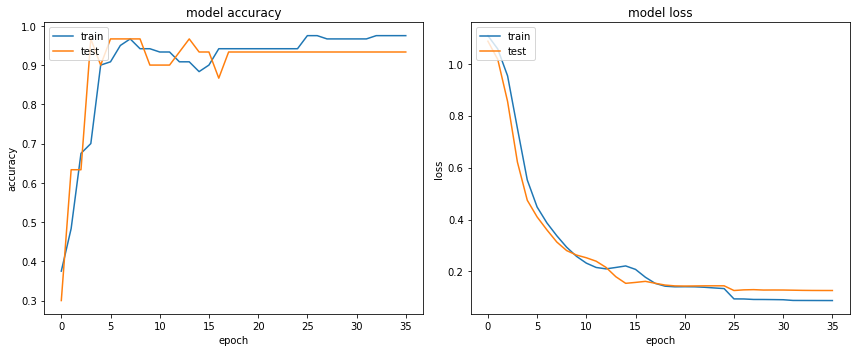

Validation Loss: 0.1267116516828537
Validation Accuracy: 0.9333333373069763


In [ ]:
adam = Adam(learning_rate=0.01)

report = examine_optimizer(optimizer = adam,
                  opt_name = 'Adam',
                  batch_size = 8, # power of 2
                  data_train = (X_train, y_train),
                  data_test = (X_test, y_test),
                  report = report
                  )

You can see that it reached the minima in 35 epochs which is about 2x faster than RMSprop and even much faster that Vanilla Gradient Descent!

Although EarlyStopping stopped it after 35 epochs, but it had reached the minima it 25 epochs which is amazing!

Again it overfitted a bit but EarlyStopping avoided more overfitting.

<a name="together"></a>

#Final Statistics 📊

---

No we will show scores of all models in a bar plot to visualize their comparision.

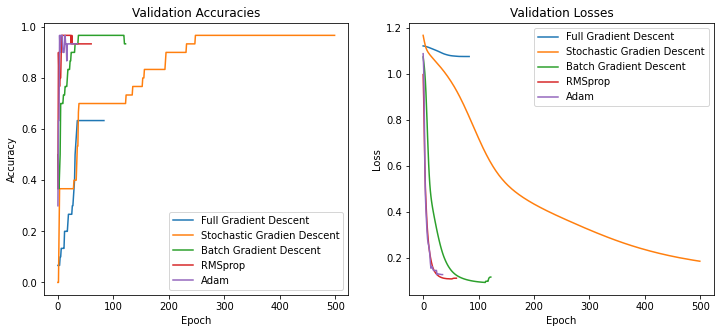

In [ ]:
# Making a figure of size 12 x 5
plt.figure(figsize=(12, 5))

# Plotting Validation Accuracies in the left subplot
plt.subplot(1, 2, 1)
for name, (history, eval) in report.items():
    plt.plot(history.history['val_accuracy'])

plt.title('Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.legend(list(report.keys()))

# Plotting Validation Losses in the right subplot
plt.subplot(1, 2, 2)
for opt_name, (history, eval) in report.items():
    plt.plot(history.history['val_loss'])

plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(list(report.keys()))
plt.show()

It is just incredible how fast RMSprop and Adam are! Ther outranked other optimizers easily and that is the magic of momentum!

 Also previously I mentioned that stairing form of accuracy charts is because of ReduceLROnPlateau callback which decreases learning rate when optimizer cannot converge loss value to a smaller value, lets see how learning rates has changed during the training process:

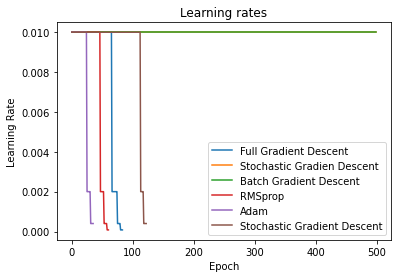

In [ ]:
for opt_name, (history, eval) in report.items():
    plt.plot(history.history['lr'])

plt.title('Learning rates')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')
plt.legend(list(report.keys()))
plt.show()

Now you can see that stairing form of accuracy charts are because of these learning rates, when value function doesn't change, ReduceLROnPlateau callback decays learning rate which forms an stairing pattern in both learning rate and accuract chart. 

**Also notice that accuracy is an integer parameter so anyway it has this starining form but decaying learning rate exaggerates this pattern.**

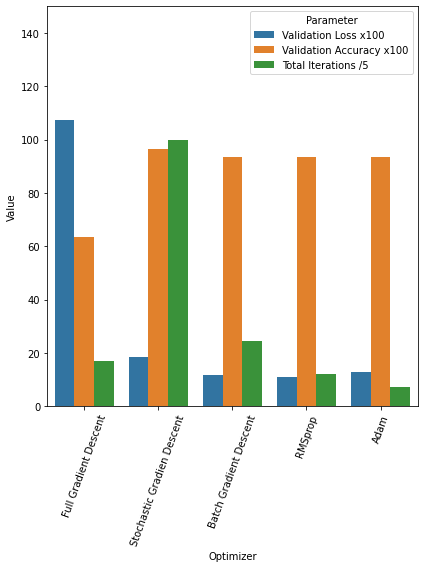

In [ ]:
comparision_data = []

# Making list of parameters with their values
for opt_name, (history, eval) in report.items():
    comparision_data.extend(
        [
            [
            opt_name,
            'Validation Loss x100',
            eval[0] * 100
            ],
            [
            opt_name,
            'Validation Accuracy x100',
            eval[1] * 100
            ],
            [
            opt_name,
            'Total Iterations /5',
            len(history.history['loss']) / 5
            ]
        ]
    )
# Converting parameters list to pandas DataFrame
comparision_data = pd.DataFrame(comparision_data,
                                columns=['Optimizer', 'Parameter', 'Value'])

# Plotting the parameters
plt.figure(figsize=(6, 8))
sns.barplot(data=comparision_data, x='Optimizer', y='Value', hue='Parameter')
plt.ylim((0, 150))
plt.xticks(rotation=70)
plt.tight_layout()

In the above chart I have multiplied accuracy and loss to 100 because their were in range of [0, 1] and divided iterations(epochs) by 5 because they were in range of [0, 500] so changed all parameter to the same scale of [0, 100].

So all in all, using sophisticated callbacks we could handle the optimizers to reach a high accuracy and low loss, except for Full Gradient Descent because it fed too much repeatitive samples to the network. So the most significant paramter it total number of iterations for each optimizer which shows that RMSprop and Adam did the same job as Stochastic and Batch Gradient Descent but using much less iterations! 

Thanks for you attention! This notebook is available in the link below😀
https://colab.research.google.com/drive/1ChupoRR9UAK9WooIjauB5OLum5fq1OIQ?usp=sharing